In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
data = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [130]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
from collections import Counter
count = Counter(corpus)
frequest = count.most_common(10)
print(frequest)

[('back', 3), ('food good', 3), ('disappoint', 3), ('love place', 3), ('return', 2), ('delici', 2), ('go back', 2), ('food terribl', 2), ('mistak', 2), ('not back', 2)]


In [132]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1566)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, -1].values

In [133]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


In [135]:
len(x[0])

1566

In [136]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [137]:
y_pred = model.predict(x_test)

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
accuracy_score(y_test, y_pred)

0.73

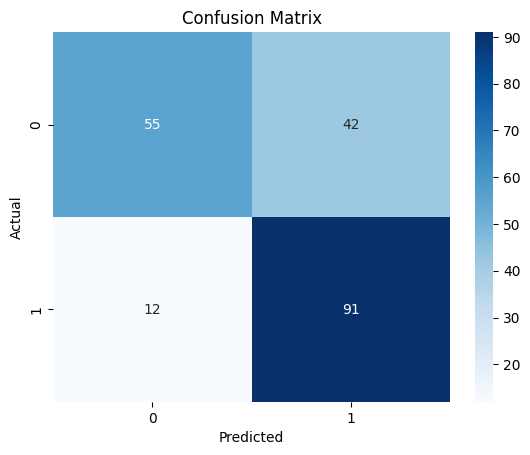

In [139]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

My own positive review

In [144]:
new_review = 'The food waas awesome, I really enjoyed my food here'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
if new_y_pred == 1:
  print('Positive Review, the customer liked this restaurant')
else:
  print('Negative Review, the customer did not like this restaurant')


Positive Review, the customer liked this restaurant


My own negative review

In [149]:
new_review = 'The food was terrible, I regret coming to this place'
new_review = re.sub('[^a-zA-Z]', ' ', new_review)
new_review = new_review.lower()
new_review = new_review.split()
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = ' '.join(new_review)
new_corpus = [new_review]
new_X_test = cv.transform(new_corpus).toarray()
new_y_pred = model.predict(new_X_test)
if new_y_pred == 1:
  print('Positive Review, the customer liked this restaurant')
else:
  print('Negative Review, the customer did not like this restaurant')

Negative Review, the customer did not like this restaurant


The result was exactly what the customer thought 🥰
our model's performance was awesome with an accuracy score of 73%